In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_df = pd.read_csv('C:/kyj/python/BigDataAnalysis/mpg_auto.csv', header=0,engine='python')
print(data_df.shape)
data_df.head()

(398, 11)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,Unnamed: 9,Unnamed: 10
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet,NaN,NaN
1,15.0,8,350.0,165,3693,11.5,70,1,buick,NaN,NaN
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth,NaN,NaN
3,16.0,8,304.0,150,3433,12.0,70,1,amc,NaN,NaN
4,17.0,8,302.0,140,3449,10.5,70,1,ford,NaN,NaN


In [12]:
data_df = data_df.drop(['car_name','origin','horsepower','Unnamed: 9','Unnamed: 10'],axis=1, inplace=False)
data_df.head()
print(data_df.shape)

(398, 6)


In [13]:
Y = data_df['mpg']
X = data_df.drop(['mpg'],axis=1,inplace=False)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [15]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_predict = lr.predict(X_test)

In [17]:
mse = mean_squared_error(Y_test,Y_predict)
rmse = np.sqrt(mse)
print('MSE:{0:.3f}, RMSE: {1:.3f}'.format(mse,rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test,Y_predict)))

MSE:12.278, RMSE: 3.504
R^2(Variance score) : 0.808


In [19]:
print('회귀계수: ',np.round(lr.coef_,2))
print('Y절편: ',np.round(lr.intercept_,2))

회귀계수:  [-0.14  0.01 -0.01  0.2   0.76]
Y절편:  -17.55


In [20]:
coef=pd.Series(data=np.round(lr.coef_,2), index=X.columns)
coef.sort_values(ascending=False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

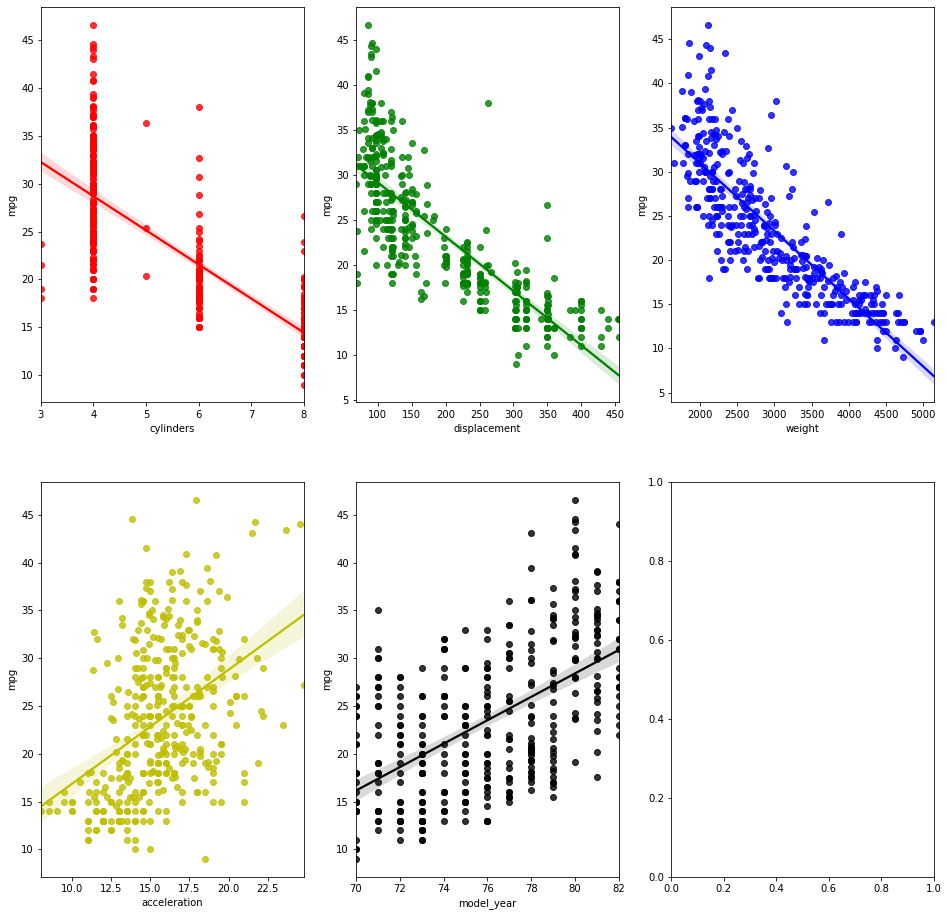

In [25]:
fig,axs = plt.subplots(figsize=(16,16), ncols=3, nrows=2)
x_features = ['cylinders','displacement','weight','acceleration','model_year']
plot_color = ['r','g','b','y','k']
for i,feature in enumerate(x_features):
    row=int(i/3)
    col=i%3
    sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

In [27]:
print("연비 예측")
cylinders_1 = int(input("cylinder: "))
displacement_1 = int(input("displacement: "))
weight_1 = int(input("weight: "))
acceleration_1 = int(input("acceleration: "))
model_year_1 = int(input("model_year: "))
mpg_pridict = lr.predict([[cylinders_1, displacement_1, weight_1, acceleration_1, model_year_1]])
print("예상 연비: %.2f"%mpg_pridict)

연비 예측
cylinder: 8
displacement: 350
weight: 3200
acceleration: 22
model_year: 99
예상 연비: 41.32
